<a href="https://colab.research.google.com/github/anastasija-krstanoska/VNP_203111/blob/master/%D0%A1%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D0%B4%D0%BD%D0%B0_%D1%81%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%81%D0%BA%D0%B0_203111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Анастасија Крстаноска 203111

**TEMA 20:** Да се соберат податоци за цената на акциите на компаниите Amazon, Apple, Exxon, Nike, Pfizer и Tesla за изминатите 4 години. Потоа, да се направат мрежи на поврзаноста на цената на овие податоци. За крај, со помош на мерки на централност (Centrality Measures) да се објаснат резултатите.

- Собирање на податоци: https://finance.yahoo.com/



*   Tesla : https://finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch
*   Nike: https://finance.yahoo.com/quote/NKE?p=NKE
*   Amazon: https://finance.yahoo.com/quote/AMZN?p=AMZN
*   Apple: https://finance.yahoo.com/quote/AAPL?p=AAPL
*   Exxon: https://finance.yahoo.com/quote/XOM?p=XOM








Вчитување на податоци и претпроцесирање на истите





In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# List of company names and their corresponding CSV file paths
companies = {
    'Amazon': '/content/drive/MyDrive/ВНП проект/datasets/AMZN.csv',
    'Apple': '/content/drive/MyDrive/ВНП проект/datasets/AAPL.csv',
    'Exxon': '/content/drive/MyDrive/ВНП проект/datasets/XOM.csv',
    'Nike': '/content/drive/MyDrive/ВНП проект/datasets/NKE.csv',
    'Pfizer': '/content/drive/MyDrive/ВНП проект/datasets/PFE.csv',
    'Tesla': '/content/drive/MyDrive/ВНП проект/datasets/TSLA.csv'
}

# Dictionary to store DataFrames for each company
data_frames = {}

# Import data for each company
for company, file_path in companies.items():
    data_frames[company] = pd.read_csv(file_path)

# Display the first few rows of each DataFrame
for company, df in data_frames.items():
    print(f"Data for {company}:\n{df.head()}\n")


Data for Amazon:
         Date        Open        High         Low       Close   Adj Close  \
0  2022-08-22  135.259995  137.830002  130.500000  130.750000  130.750000   
1  2022-08-29  129.899994  132.070007  123.660004  127.510002  127.510002   
2  2022-09-05  127.919998  133.690002  124.739998  133.270004  133.270004   
3  2022-09-12  134.100006  136.490005  120.699997  123.529999  123.529999   
4  2022-09-19  122.160004  124.709999  112.059998  113.779999  113.779999   

      Volume  
0   90819000  
1  265019200  
2  185165000  
3  340392700  
4  273832900  

Data for Apple:
         Date       Open       High        Low      Close  Adj Close  \
0  2019-09-01  51.607498  56.605000  51.055000  55.992500  54.458057   
1  2019-10-01  56.267502  62.437500  53.782501  62.189999  60.485714   
2  2019-11-01  62.384998  67.000000  62.290001  66.812500  64.981552   
3  2019-12-01  66.817497  73.492500  64.072502  73.412498  71.615036   
4  2020-01-01  74.059998  81.962502  73.187500  77.37

2.Проверка и чистење на податоците

2.1 Handling Missing Values:


In [ ]:
for company, df in data_frames.items():
    print(f"Handling missing values for {company}")

    # Display the count of missing values before handling
    print(f"Missing values before handling for {company}:\n{df.isnull().sum()}")

    # Handling missing values
    df.dropna(inplace=True)  # Remove rows with missing values

    # Display the count of missing values after handling
    print(f"Missing values after handling for {company}:\n{df.isnull().sum()}")

    print("\n")


Handling missing values for Amazon
Missing values before handling for Amazon:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values after handling for Amazon:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Handling missing values for Apple
Missing values before handling for Apple:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values after handling for Apple:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Handling missing values for Exxon
Missing values before handling for Exxon:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values after handling for Exxon:
Date         0
Open         0
High         0
Low    

Според добиените резултати ниту еден датасет нема missing values.

Дефинирање на коефициент на корелација, и визуелизација на граф.

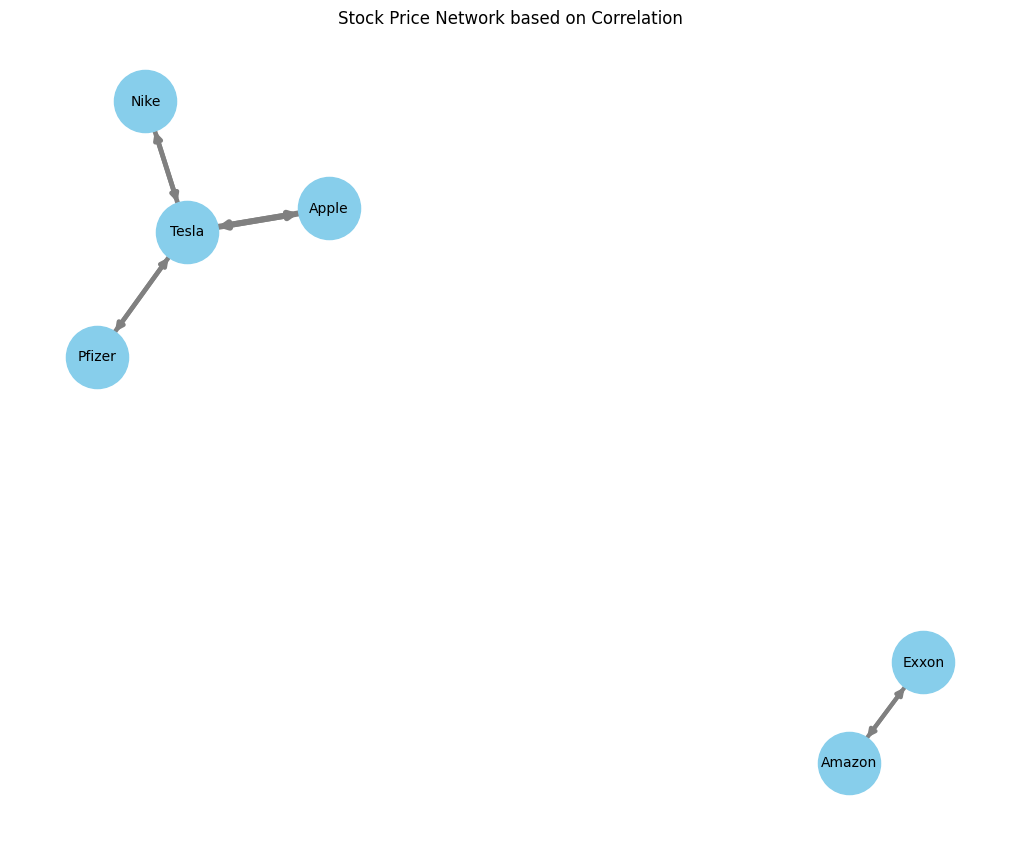

In [ ]:
# Create an empty directed graph
G = nx.DiGraph()

# Add nodes for each company
for company in companies:
    G.add_node(company)

# Calculate correlation coefficients and add edges based on correlation threshold
correlation_threshold = 0.6  # Adjust as needed
for company1 in companies:
    for company2 in companies:
        if company1 != company2:
            correlation = data_frames[company1]['Close'].corr(data_frames[company2]['Close'])
            if correlation > correlation_threshold:
                G.add_edge(company1, company2, weight=correlation)

# Visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
edges = G.edges()
weights = [G[u][v]['weight'] * 5 for u, v in edges]
nx.draw(G, pos, edge_color='gray', width=weights, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="black")
plt.title("Stock Price Network based on Correlation")
plt.show()

Анализа на мрежата (Network Analysis):


In [ ]:
# Exploration of the Network
print("Number of Nodes (Companies):", G.number_of_nodes())
print("Number of Edges (Connections):", G.number_of_edges())
print("\n")

# Degree Centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:")
for company, centrality in degree_centrality.items():
    print(f"{company}: {centrality}")
print("\n")

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:")
for company, centrality in betweenness_centrality.items():
    print(f"{company}: {centrality}")
print("\n")

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:")
for company, centrality in closeness_centrality.items():
    print(f"{company}: {centrality}")
print("\n")

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)
print("Clustering Coefficient:")
for company, coefficient in clustering_coefficient.items():
    print(f"{company}: {coefficient}")
print("\n")

# Triadic Closure
triadic_closure = nx.transitivity(G)
print("Triadic Closure:", triadic_closure)


# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Eigenvector Centrality:")
for company, centrality in eigenvector_centrality.items():
    print(f"{company}: {centrality}")
print("\n")

# PageRank Centrality
pagerank_centrality = nx.pagerank(G)
print("PageRank Centrality:")
for company, centrality in pagerank_centrality.items():
    print(f"{company}: {centrality}")

Number of Nodes (Companies): 6
Number of Edges (Connections): 8


Degree Centrality:
Amazon: 0.4
Apple: 0.4
Exxon: 0.4
Nike: 0.4
Pfizer: 0.4
Tesla: 1.2000000000000002


Betweenness Centrality:
Amazon: 0.0
Apple: 0.0
Exxon: 0.0
Nike: 0.0
Pfizer: 0.0
Tesla: 0.30000000000000004


Closeness Centrality:
Amazon: 0.2
Apple: 0.36
Exxon: 0.2
Nike: 0.36
Pfizer: 0.36
Tesla: 0.6


Clustering Coefficient:
Amazon: 0
Apple: 0
Exxon: 0
Nike: 0
Pfizer: 0
Tesla: 0


Triadic Closure: 0
Eigenvector Centrality:
Amazon: 6.878762144409664e-06
Apple: 0.4082482904445458
Exxon: 6.878762144409664e-06
Nike: 0.4082482904445458
Pfizer: 0.4082482904445458
Tesla: 0.7071067811530891


PageRank Centrality:
Amazon: 0.16666666666666666
Apple: 0.13154986255424267
Exxon: 0.16666666666666666
Nike: 0.10919066936317903
Pfizer: 0.10610758342394125
Tesla: 0.3198185513253038


Визуелизација на добиените резултати.

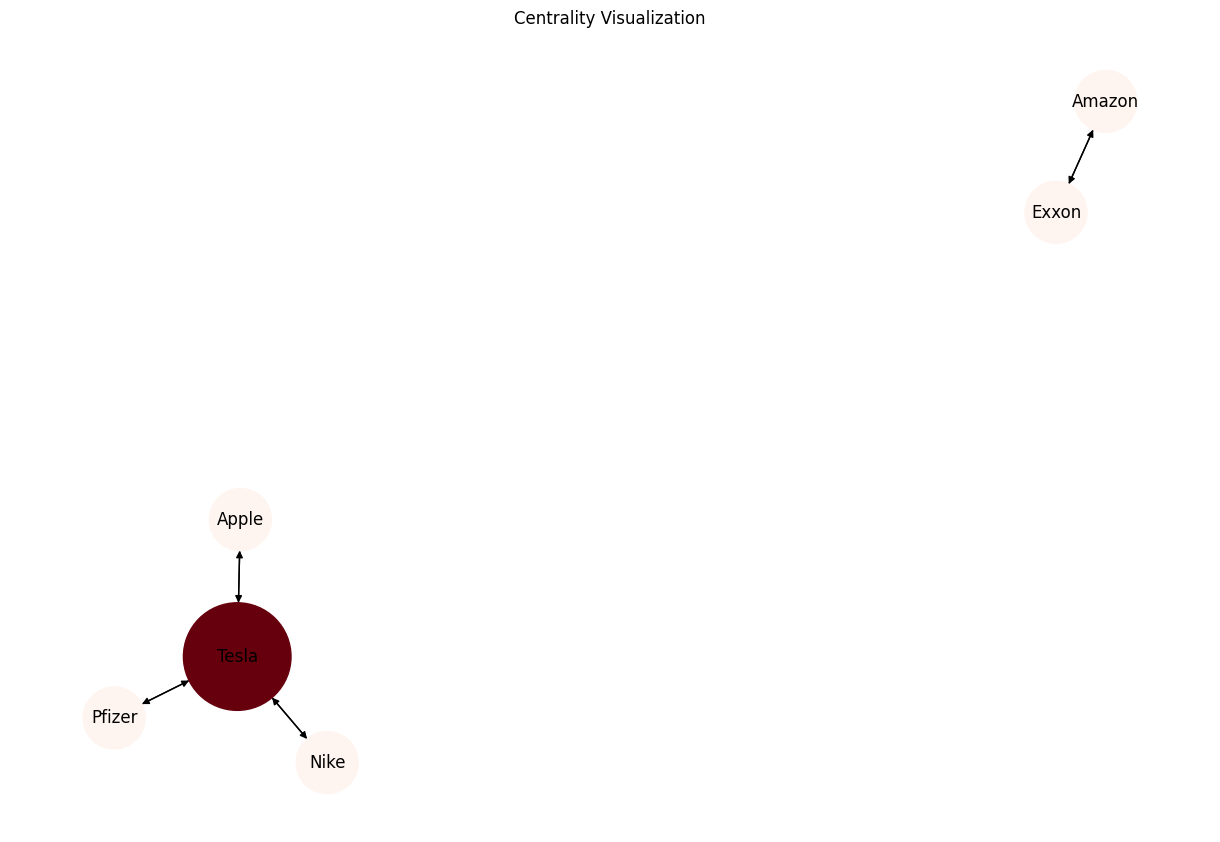

In [ ]:
# Visualization of Centrality
plt.figure(figsize=(12, 8))

# Set node colors based on centrality
node_colors = [degree_centrality[node] for node in G.nodes()]

# Draw nodes with sizes proportional to their centrality values
pos = nx.spring_layout(G)  # You may need to adjust the layout algorithm
nx.draw(G, pos, node_color=node_colors, cmap=plt.cm.Reds,
        node_size=[v * 5000 for v in degree_centrality.values()], with_labels=True)

# Customize plot appearance
plt.title("Centrality Visualization")
plt.show()

Анализа на централност

In [ ]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank_centrality = nx.pagerank(G)

# Identify companies with highest centrality values for each measure
def get_top_companies(centrality_dict, num_companies):
    sorted_companies = sorted(centrality_dict, key=centrality_dict.get, reverse=True)
    return sorted_companies[:num_companies]

top_degree_companies = get_top_companies(degree_centrality, num_companies=5)
top_closeness_companies = get_top_companies(closeness_centrality, num_companies=5)
top_betweenness_companies = get_top_companies(betweenness_centrality, num_companies=5)
top_eigenvector_companies = get_top_companies(eigenvector_centrality, num_companies=5)
top_pagerank_companies = get_top_companies(pagerank_centrality, num_companies=5)

print("Top Companies by Degree Centrality:", top_degree_companies)
print("Top Companies by Closeness Centrality:", top_closeness_companies)
print("Top Companies by Betweenness Centrality:", top_betweenness_companies)
print("Top Companies by Eigenvector Centrality:", top_eigenvector_companies)
print("Top Companies by PageRank Centrality:", top_pagerank_companies)


Top Companies by Degree Centrality: ['Tesla', 'Amazon', 'Apple', 'Exxon', 'Nike']
Top Companies by Closeness Centrality: ['Tesla', 'Apple', 'Nike', 'Pfizer', 'Amazon']
Top Companies by Betweenness Centrality: ['Tesla', 'Amazon', 'Apple', 'Exxon', 'Nike']
Top Companies by Eigenvector Centrality: ['Tesla', 'Apple', 'Nike', 'Pfizer', 'Amazon']
Top Companies by PageRank Centrality: ['Tesla', 'Amazon', 'Exxon', 'Apple', 'Nike']


Пораст и пад на цени

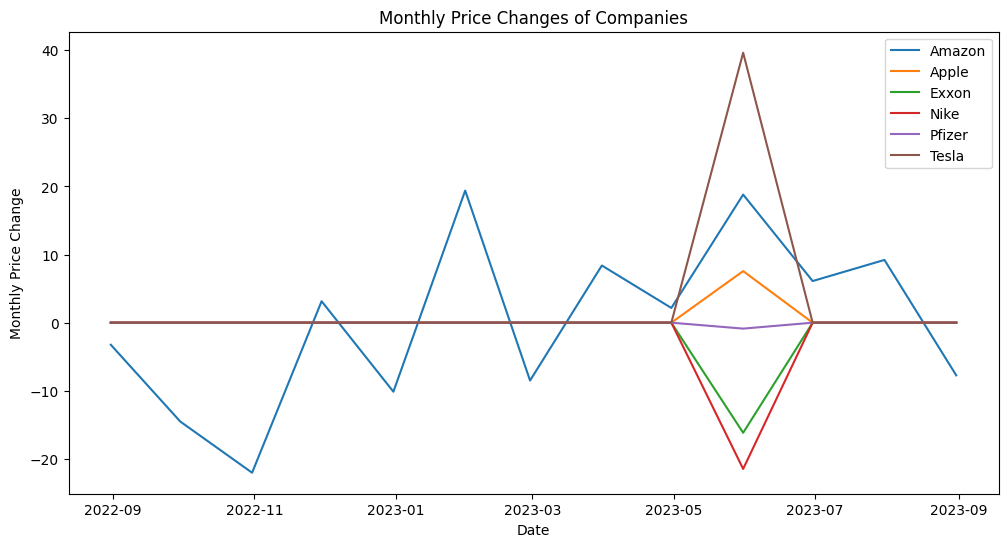

In [ ]:
# Create an empty DataFrame to store price changes
price_changes = pd.DataFrame()

# Import data and calculate daily price changes for each company
for company, file_path in companies.items():
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['Price Change'] = df['Close'].diff()  # Calculate daily price changes
    price_changes[company] = df['Price Change']



monthly_price_changes = price_changes.resample('M').sum()

# Visualize monthly price changes using line plots
plt.figure(figsize=(12, 6))
for company in monthly_price_changes.columns:
    plt.plot(monthly_price_changes.index, monthly_price_changes[company], label=company)

plt.xlabel('Date')
plt.ylabel('Monthly Price Change')
plt.title('Monthly Price Changes of Companies')
plt.legend()
plt.show()


# # Visualize price changes using line plots  -- ова за дневни цени

# plt.figure(figsize=(12, 6))
# for company in price_changes.columns:
#     plt.plot(price_changes.index, price_changes[company], label=company)

# plt.xlabel('Date')
# plt.ylabel('Price Change')
# plt.title('Daily Price Changes of Companies')
# plt.legend()
# plt.show()

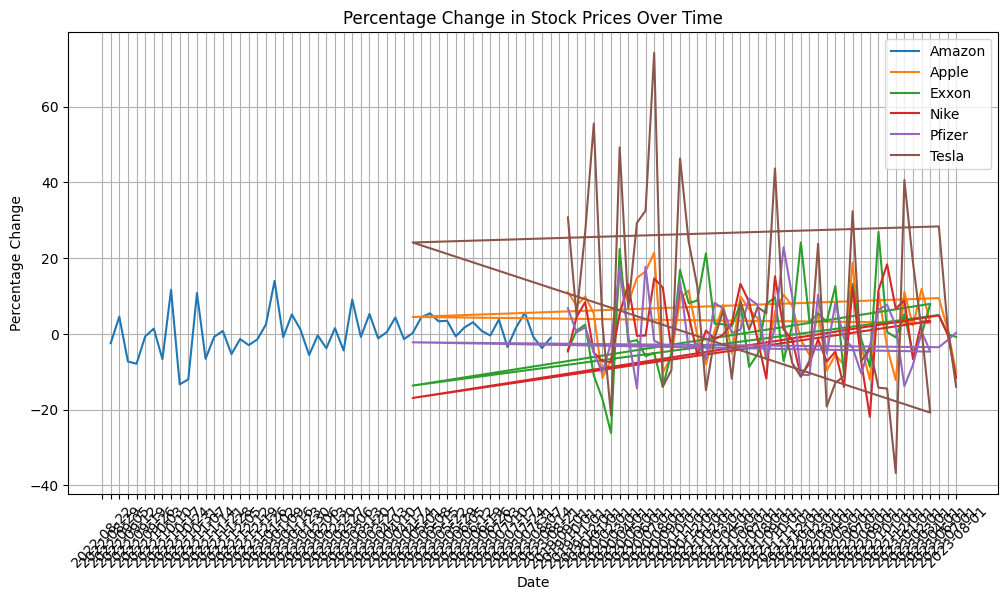

In [ ]:
# Define a function to calculate percentage change
def calculate_percentage_change(series):
    return series.pct_change() * 100

# Calculate percentage change for each company's stock prices
for company in data_frames.keys():
    data_frames[company]['Percentage Change'] = calculate_percentage_change(data_frames[company]['Close'])

# Plotting the percentage change for each company
plt.figure(figsize=(12, 6))
for company in data_frames.keys():
    plt.plot(data_frames[company]['Date'], data_frames[company]['Percentage Change'], label=company)

plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

5. Анализа на групи - кластери


Проверка на NaN вредности

In [ ]:
# Display the count of NaN values for each DataFrame
for company, df in data_frames.items():
    print(f"NaN values in {company} data:")
    print(df.isnull().sum())
    print("\n")


NaN values in Amazon data:
Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Percentage Change    1
Cluster              0
dtype: int64


NaN values in Apple data:
Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Percentage Change    1
Cluster              0
dtype: int64


NaN values in Exxon data:
Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Percentage Change    1
Cluster              0
dtype: int64


NaN values in Nike data:
Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Percentage Change    1
Cluster              0
dtype: int64


NaN valu

* NaN вредности во Percentage Change, па решавање на проблемот со промена со средната вредност.

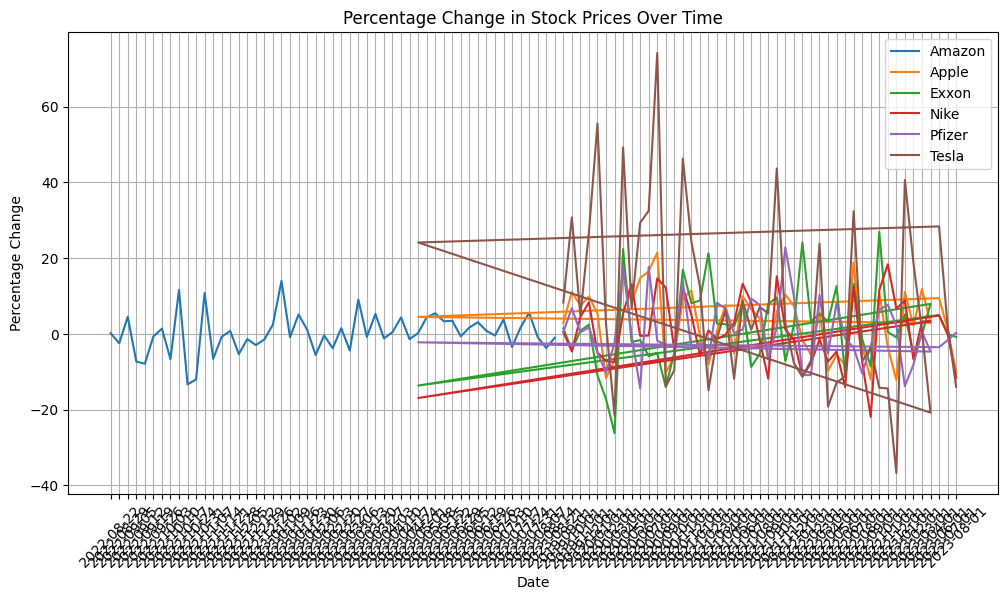

In [ ]:
# Define a function to calculate percentage change
def calculate_percentage_change(series):
    return series.pct_change() * 100

# Calculate percentage change for each company's stock prices
for company in data_frames.keys():
    data_frames[company]['Percentage Change'] = calculate_percentage_change(data_frames[company]['Close'])

# Fill NaN values with the mean of the column
for company in data_frames.keys():
    mean_percentage_change = data_frames[company]['Percentage Change'].mean()
    data_frames[company]['Percentage Change'].fillna(mean_percentage_change, inplace=True)

# Plotting the percentage change for each company
plt.figure(figsize=(12, 6))
for company in data_frames.keys():
    plt.plot(data_frames[company]['Date'], data_frames[company]['Percentage Change'], label=company)

plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Display the count of NaN values for each DataFrame
for company, df in data_frames.items():
    print(f"NaN values in {company} data:")
    print(df.isnull().sum())
    print("\n")


NaN values in Amazon data:
Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Percentage Change    0
dtype: int64


NaN values in Apple data:
Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Percentage Change    0
dtype: int64


NaN values in Exxon data:
Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Percentage Change    0
dtype: int64


NaN values in Nike data:
Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Percentage Change    0
dtype: int64


NaN values in Pfizer data:
Date                 0
Open                 0
High                 0
Low 

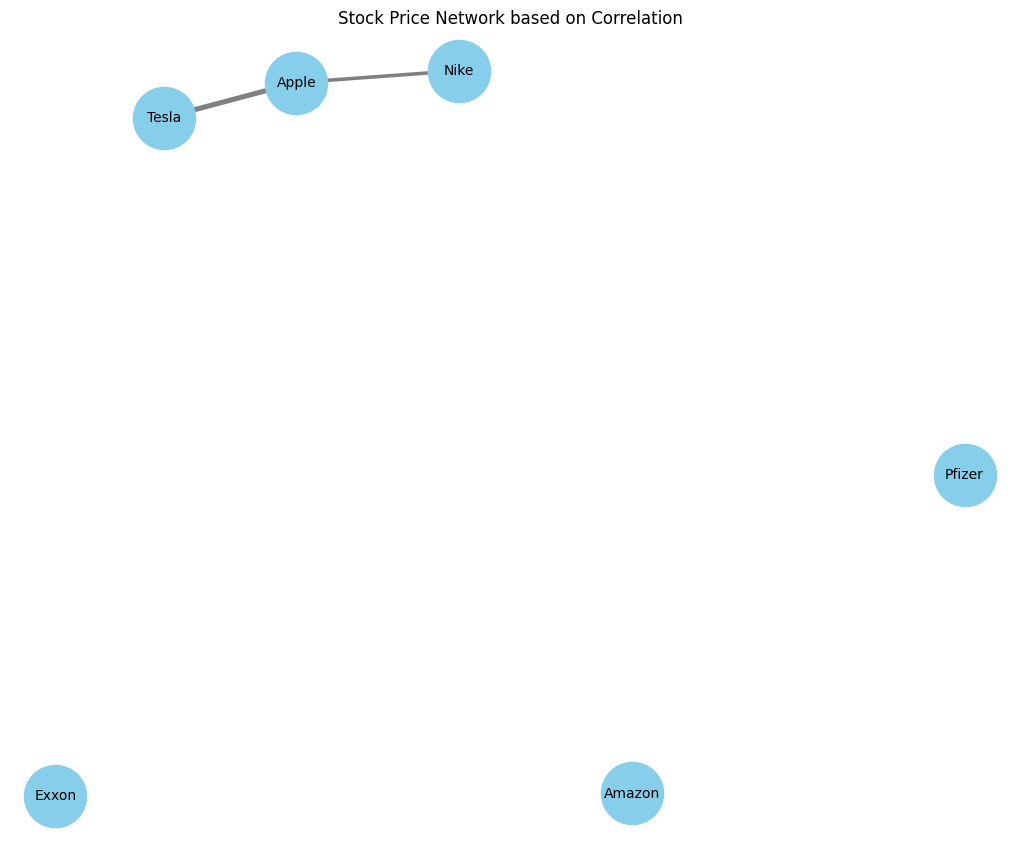

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


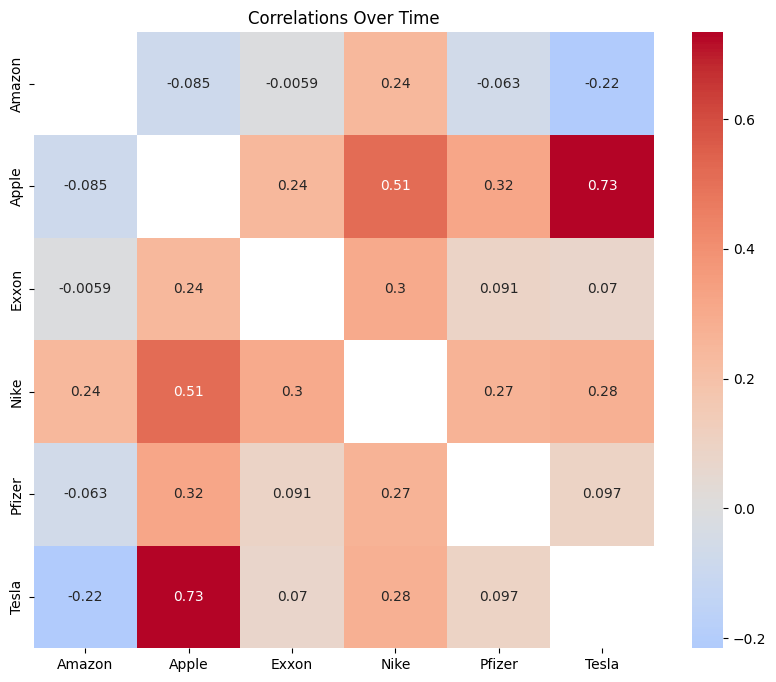

Positive Edges: [('Apple', 'Nike'), ('Apple', 'Tesla')]
Negative Edges: []


In [ ]:
# Visualization of the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
edges = G.edges()
weights = [G[u][v]['weight'] * 5 for u, v in edges]
nx.draw(G, pos, edge_color='gray', width=weights, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="black")
plt.title("Stock Price Network based on Correlation")
plt.show()

# Analysis of Clusters (Groups)
num_clusters = 3  # You can adjust this value
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_changes_imputed)

# Add cluster labels to each company's dataframe
for idx, (company, df) in enumerate(data_frames.items()):
    df['Cluster'] = clusters[idx]  # Add the cluster label to the corresponding DataFrame


# Analysis of Correlations Over Time
correlation_over_time = pd.DataFrame(columns=data_frames.keys(), index=data_frames.keys())
for company1 in data_frames.keys():
    for company2 in data_frames.keys():
        if company1 != company2:
            correlation_series = data_frames[company1]['Percentage Change'].corr(data_frames[company2]['Percentage Change'])
            correlation_over_time.loc[company1, company2] = correlation_series

# Visualization of Correlations Over Time
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_over_time.astype(float), annot=True, cmap="coolwarm", center=0)
plt.title("Correlations Over Time")
plt.show()

# Analysis of Connections (Edges)
positive_edges = []
negative_edges = []

for u, v, d in G.edges(data=True):
    correlation = d['weight']
    if correlation > 0:
        positive_edges.append((u, v))
    else:
        negative_edges.append((u, v))

print("Positive Edges:", positive_edges)
print("Negative Edges:", negative_edges)